In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import skew
from scipy.special import boxcox1p
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
import lightgbm as lgb

### Load Datasets

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Display Datasets

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
print('Shape of datasets ')
(train.shape, test.shape)

Shape of datasets 


((1460, 81), (1459, 80))

In [6]:
print("Describe the train dataset")
train.describe()

Describe the train dataset


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
print("Info of the train dataset") 
print(train.info())

Info of the train dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-nu

### Data Processing

In [8]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

# Drop the 'Id' column since it is not necessary for the prediction.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [9]:
print('Numeric columns: ')
numeric_columns = train.select_dtypes([np.number]).columns.values.tolist()
print(numeric_columns)
print('Number of Neumeric Columns = ',len(numeric_columns))

Numeric columns: 
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Number of Neumeric Columns =  37


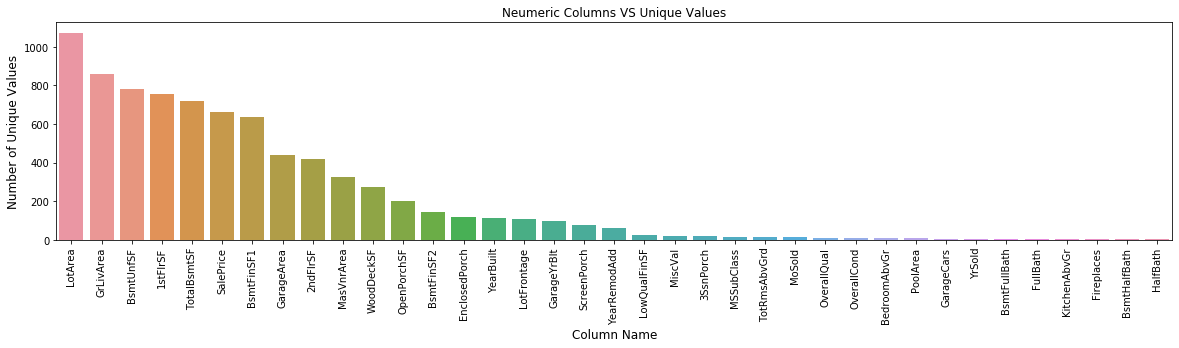

In [10]:
unique_values=[]
for item in numeric_columns: 
    unique_values.append(train[item].nunique())
    
numeric_column_unique_values = list(zip(numeric_columns, unique_values))
numeric_column_unique_values = sorted(numeric_column_unique_values, key=lambda x:x[1], reverse=True)
numeric_column_unique_values = pd.DataFrame(numeric_column_unique_values, columns=['Column', 'Counts'])

plt.subplots(figsize=(20, 4))
sns.barplot(x=numeric_column_unique_values['Column'], y=numeric_column_unique_values['Counts'])
plt.xticks(rotation=90)
plt.ylabel('Number of Unique Values', fontsize=12)
plt.xlabel('Column Name', fontsize=12)
plt.title('Neumeric Columns VS Unique Values')
plt.show()

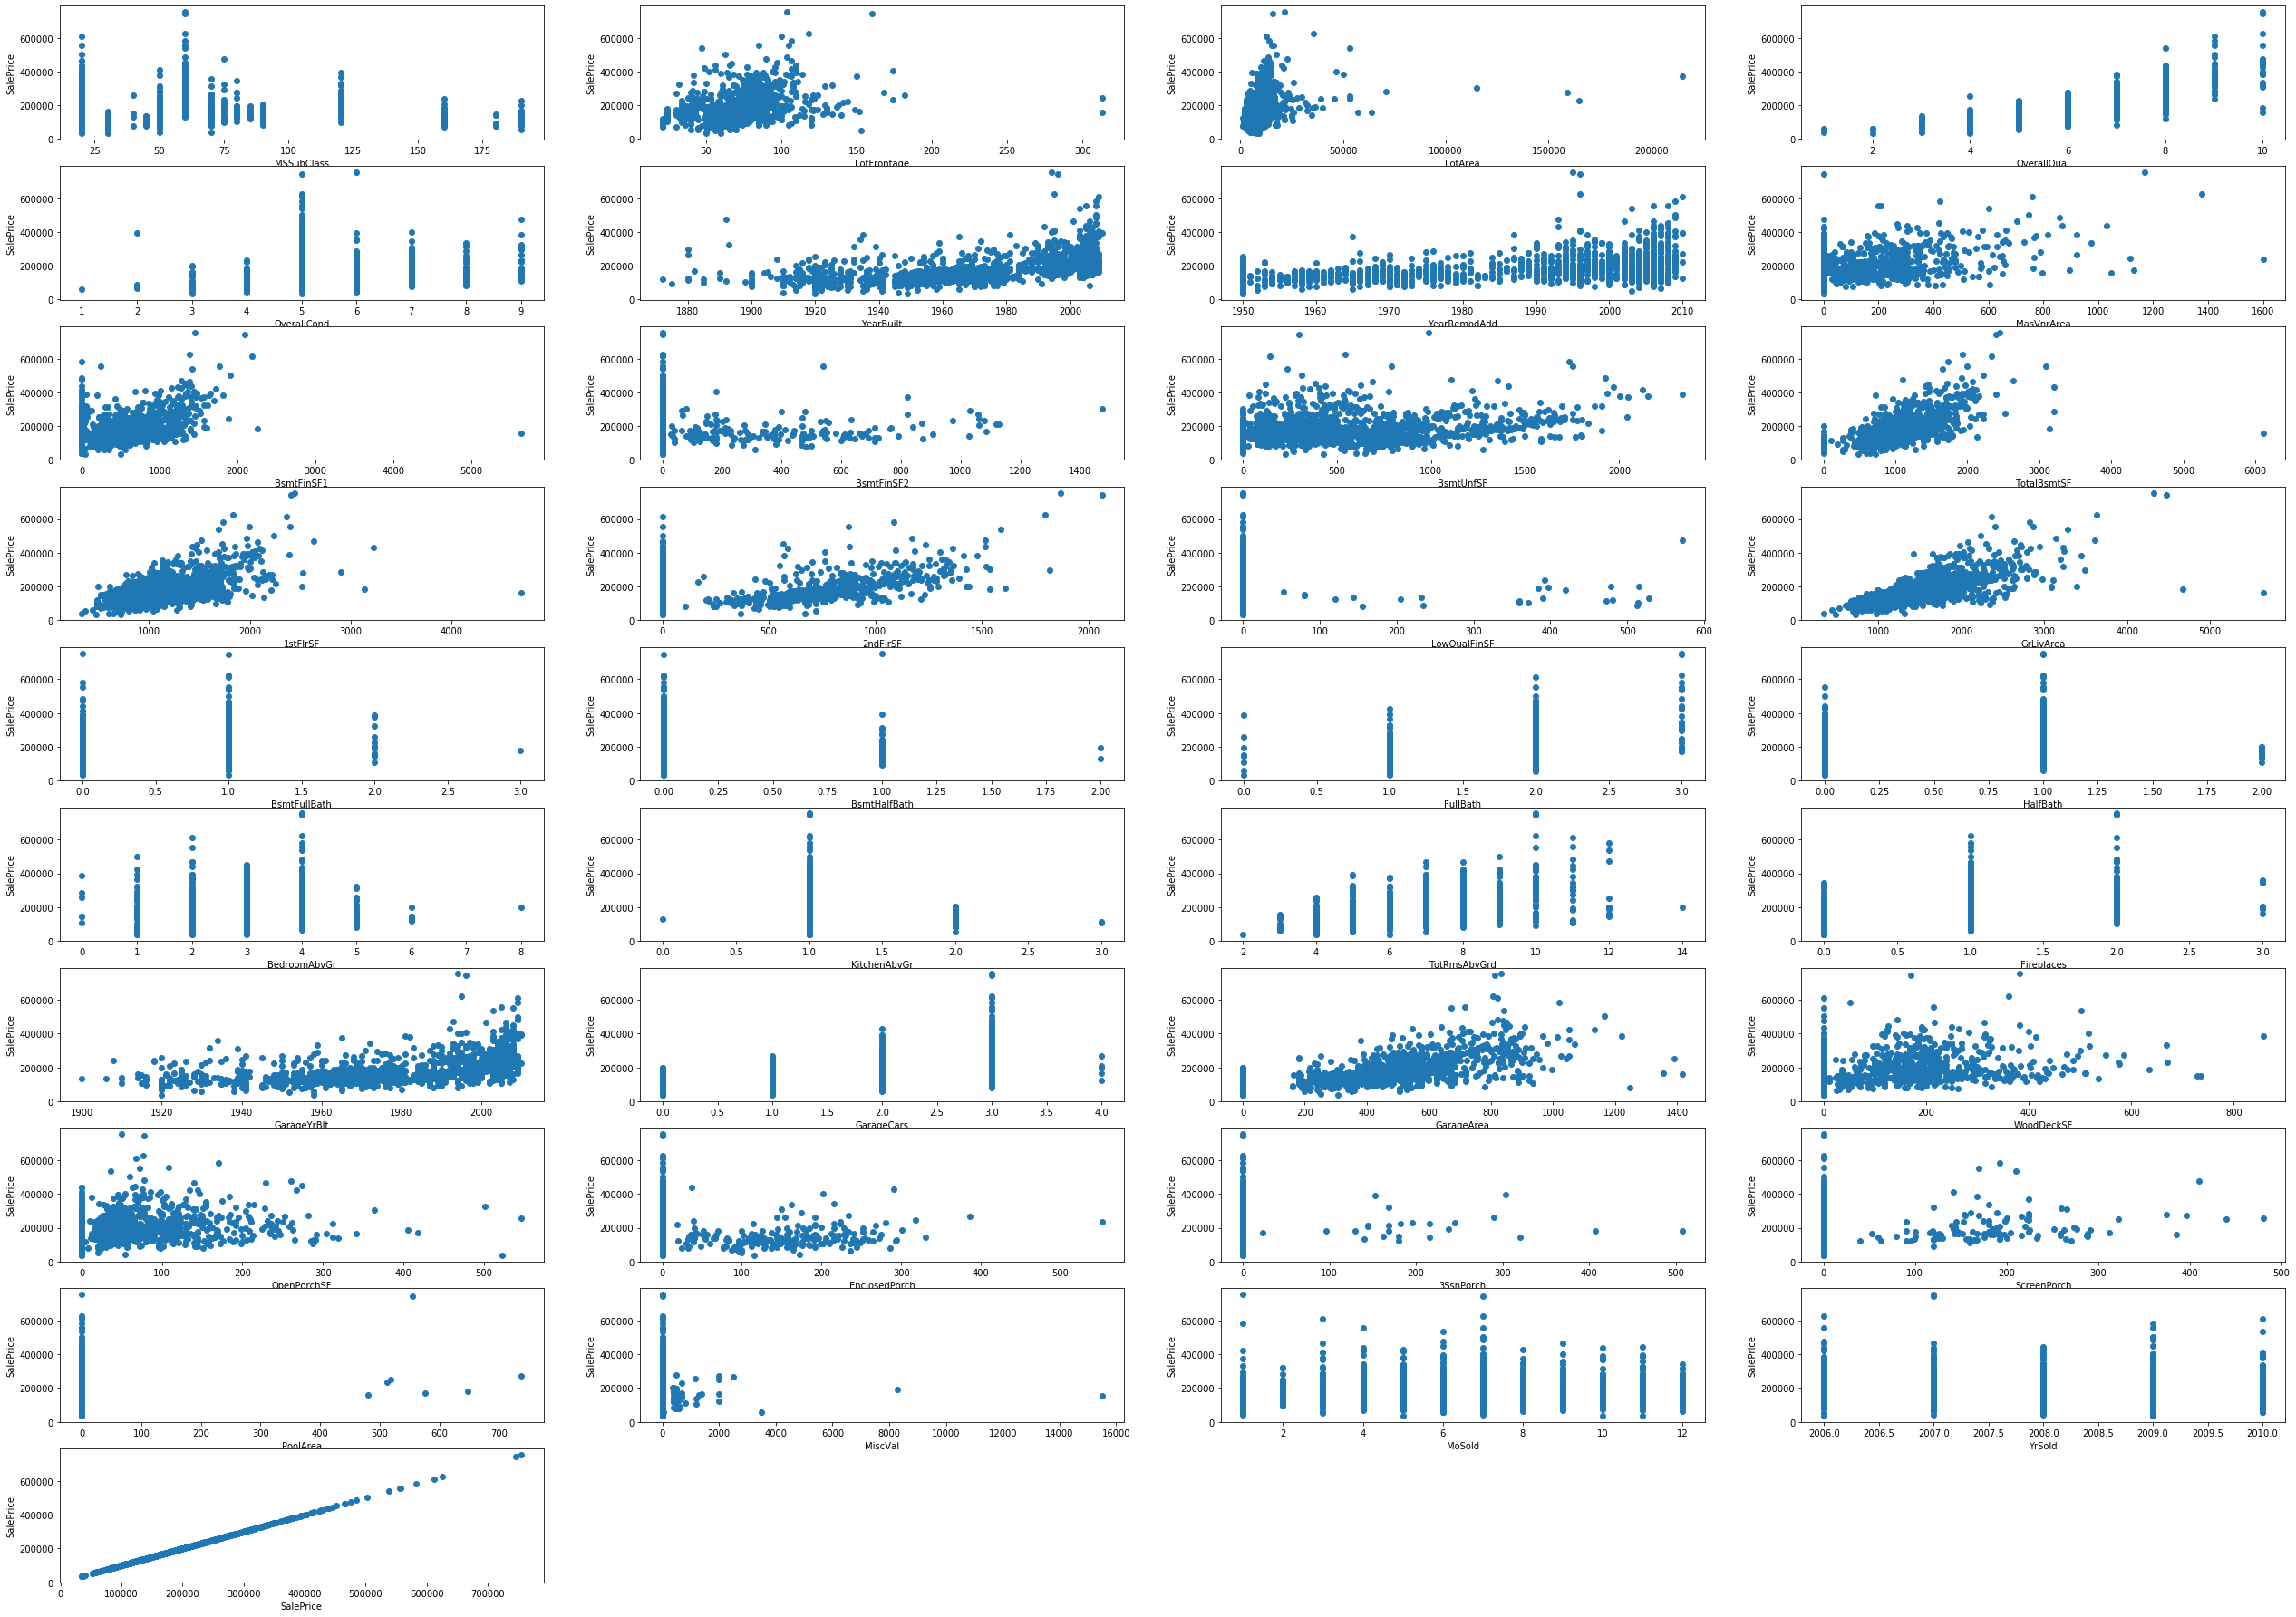

In [11]:
# Scatter-Plot of numeric features against SalesPrice
plt.subplots(figsize=(44, 32))
for i, c in enumerate(numeric_columns):
    plt.subplot(10, 4, i+1)
    plt.scatter(x = train[c], y = train['SalePrice'])
    plt.xlabel(c)
    plt.ylabel('SalePrice')
plt.show()

In [12]:
# A function to show scatter-plot and box-plot for outlier detection
def outlier_check_plot(column, train):
    plt.subplots(figsize=(14, 4))

    plt.subplot(1, 2, 1)   
    sns.boxplot(train[column])
    plt.xlabel(column, fontsize=13)
    plt.title('Box-plot of feature {}'.format(column))

    plt.subplot(1, 2, 2)
    plt.scatter(x = train[column], y = train['SalePrice'])
    plt.ylabel('SalePrice', fontsize=13)
    plt.xlabel(column, fontsize=13)
    plt.title('Scatter-plot of feature {} \n with respect to SalePrice'.format(column))
    plt.show()

Before outlier-removal of 1stFlrSF: 


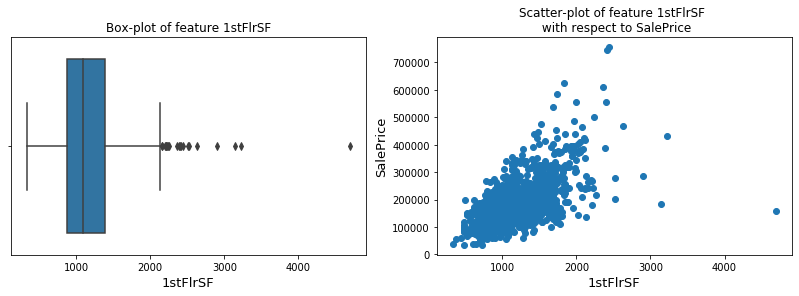

Shape of train dataset:- (1460, 80)


In [13]:
print('Before outlier-removal of 1stFlrSF: ')
outlier_check_plot('1stFlrSF', train)
print("Shape of train dataset:-", train.shape)

After outlier-removal of 1stFlrSF: 


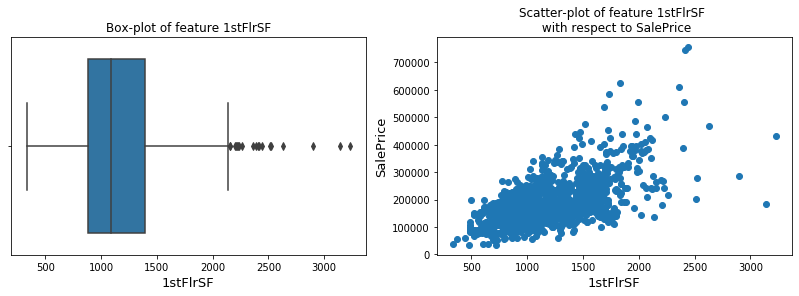

Shape of train dataset:- (1459, 80)


In [14]:
train = train[train['1stFlrSF'] <= 4000]
print('After outlier-removal of 1stFlrSF: ')
outlier_check_plot('1stFlrSF', train)
print("Shape of train dataset:-", train.shape)

Before outlier-removal of BsmtFinSF1: 


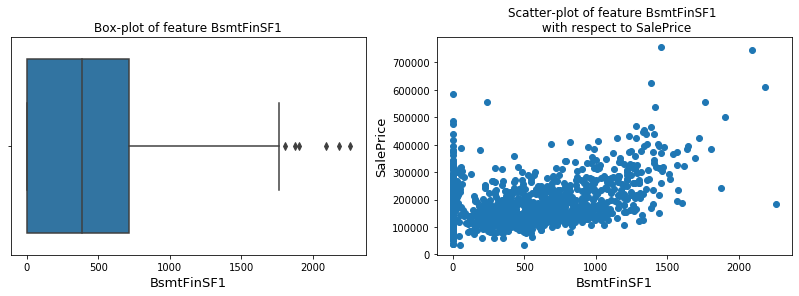

Shape of train dataset:- (1459, 80)


In [15]:
print('Before outlier-removal of BsmtFinSF1: ')
outlier_check_plot('BsmtFinSF1', train)
print("Shape of train dataset:-", train.shape)

After outlier-removal of BsmtFinSF1: 


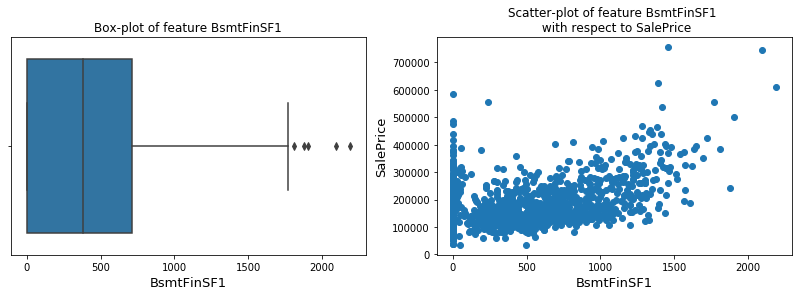

Shape of train dataset:- (1458, 80)


In [16]:
train = train.drop(train[(train['BsmtFinSF1']>2000) & (train['SalePrice']<300000)].index)
print('After outlier-removal of BsmtFinSF1: ')
outlier_check_plot('BsmtFinSF1', train)
print("Shape of train dataset:-", train.shape)

Before outlier-removal of LotArea: 


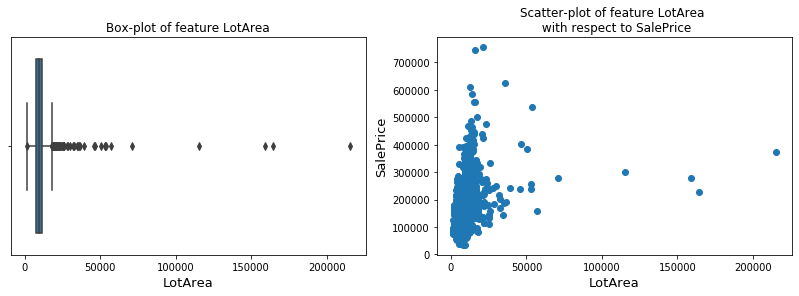

Shape of train dataset:- (1458, 80)


In [17]:
print('Before outlier-removal of LotArea: ')
outlier_check_plot('LotArea', train)
print("Shape of train dataset:-", train.shape)

After outlier-removal of LotArea: 


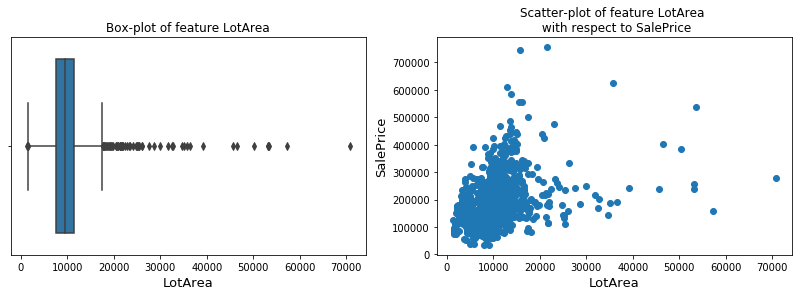

Shape of train dataset:- (1454, 80)


In [18]:
train = train[train['LotArea'] <= 80000]
print('After outlier-removal of LotArea: ')
outlier_check_plot('LotArea', train)
print("Shape of train dataset:-", train.shape)

Before outlier-removal of GrLivArea: 


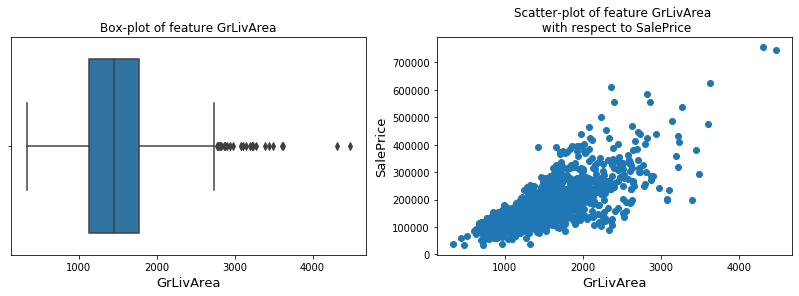

Shape of train dataset:- (1454, 80)


In [19]:
print('Before outlier-removal of GrLivArea: ')
outlier_check_plot('GrLivArea', train)
print("Shape of train dataset:-", train.shape)

Before outlier-removal of MasVnrArea: 


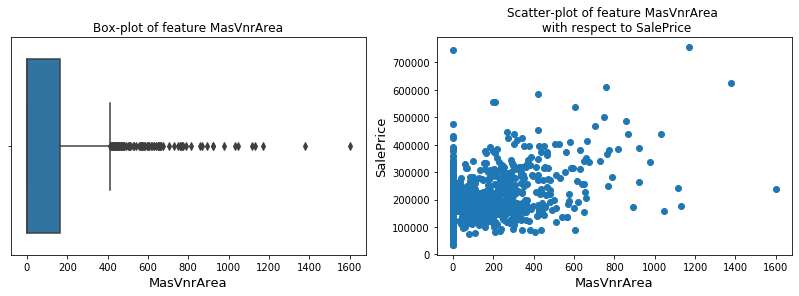

Shape of train dataset:- (1454, 80)


In [20]:
print('Before outlier-removal of MasVnrArea: ')
outlier_check_plot('MasVnrArea', train)
print("Shape of train dataset:-", train.shape)

After outlier-removal of MasVnrArea: 


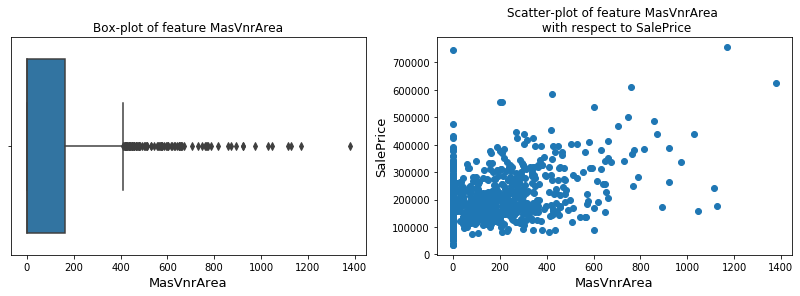

Shape of train dataset:- (1445, 80)


In [21]:
train = train[train['MasVnrArea'] <= 1500]
print('After outlier-removal of MasVnrArea: ')
outlier_check_plot('MasVnrArea', train)
print("Shape of train dataset:-", train.shape)

Before outlier-removal of LotFrontage: 


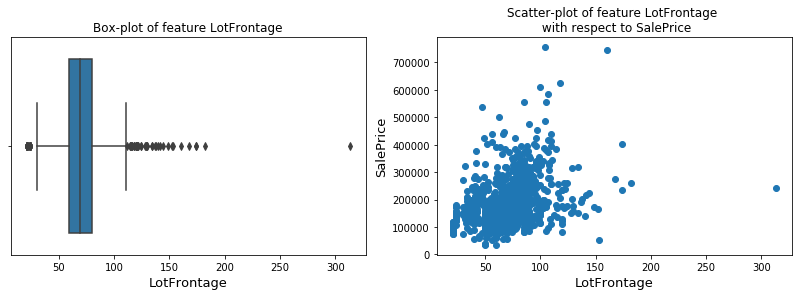

Shape of train dataset:- (1445, 80)


In [22]:
print('Before outlier-removal of LotFrontage: ')
outlier_check_plot('LotFrontage', train)
print("Shape of train dataset:-", train.shape)

After outlier-removal of LotFrontage: 


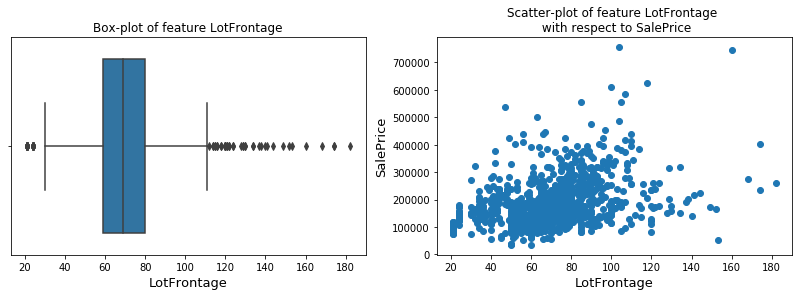

Shape of train dataset:- (1190, 80)


In [23]:
train = train[train["LotFrontage"] <= 200]
print('After outlier-removal of LotFrontage: ')
outlier_check_plot('LotFrontage', train)
print("Shape of train dataset:-", train.shape)

Before outlier-removal of TotalBsmtSF: 


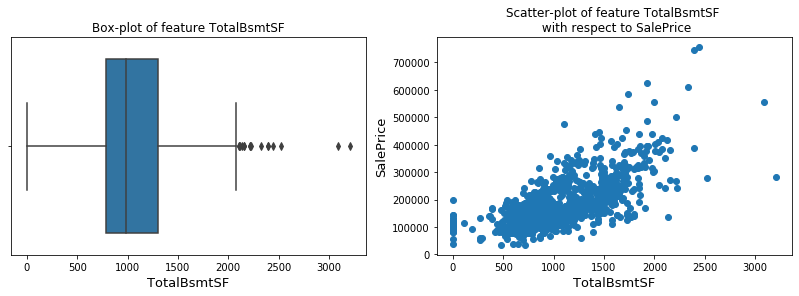

Shape of train dataset:- (1190, 80)


In [24]:
print('Before outlier-removal of TotalBsmtSF: ')
outlier_check_plot('TotalBsmtSF', train)
print("Shape of train dataset:-", train.shape)

### Features engineering

In [25]:
n_train = train.shape[0]
n_test = test.shape[0]
(n_train, n_test)

(1190, 1459)

In [26]:
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.shape

(2649, 80)

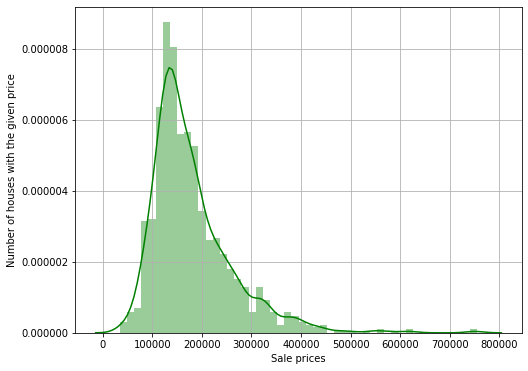

In [27]:
plt.figure(figsize=(8,6))
sns.distplot(train['SalePrice'], 50, color = "g")
plt.xlabel("Sale prices")
plt.ylabel("Number of houses with the given price") 
plt.grid(True) 
plt.show()

In [28]:
train['SalePrice'] = np.log(train['SalePrice'])

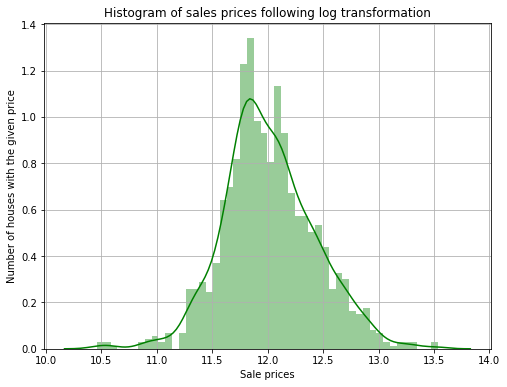

In [29]:
plt.figure(figsize=(8,6))
sns.distplot(train['SalePrice'], 50, color = "g")
plt.xlabel("Sale prices")
plt.ylabel("Number of houses with the given price") 
plt.title("Histogram of sales prices following log transformation")
plt.grid(True) 
plt.show()

In [30]:
y = train.SalePrice.values
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("Size of the merged dataset is : {}".format(all_data.shape))

Size of the merged dataset is : (2649, 79)


### Dealing with missing Values

In [31]:
print("*** Count of null values ***")
nan_columns = []
columns_nan_counts = all_data.isna().sum()
for c,v in columns_nan_counts.items():
    if v is not 0:
        nan_columns.append(c)
missing_count_df = pd.DataFrame(columns_nan_counts.items(), columns=['Column', 'MissingCount']).sort_values('MissingCount', ascending=False).reset_index(drop=True)
missing_count_df = missing_count_df.loc[missing_count_df['MissingCount'] > 0]
missing_count_df 

*** Count of null values ***


,Column,MissingCount
0,PoolQC,2641
1,MiscFeature,2559
2,Alley,2458
3,Fence,2131
4,FireplaceQu,1326
5,LotFrontage,227
6,GarageYrBlt,152
7,GarageFinish,152
8,GarageQual,152
9,GarageCond,152


In [32]:
print("***Percentage of missing values***") 
missing_percentage = {}
for c in nan_columns:
    missing_percentage[c] = (100*(all_data[c].isnull().sum())/all_data.shape[0]).round(1)

missing_percentage_df = pd.DataFrame(missing_percentage.items(), columns=['Column', 'MissingPercentage']).sort_values('MissingPercentage', ascending=False).reset_index(drop=True)
missing_percentage_df

***Percentage of missing values***


,Column,MissingPercentage
0,PoolQC,99.7
1,MiscFeature,96.6
2,Alley,92.8
3,Fence,80.4
4,FireplaceQu,50.1
5,LotFrontage,8.6
6,GarageFinish,5.7
7,GarageType,5.7
8,GarageQual,5.7
9,GarageCond,5.7


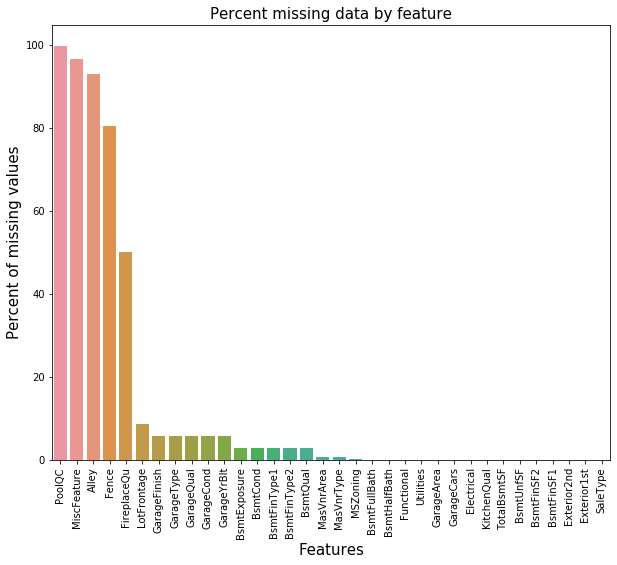

In [33]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation='90')
sns.barplot(x=missing_percentage_df['Column'], y=missing_percentage_df['MissingPercentage'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.show()

### Data Correlation

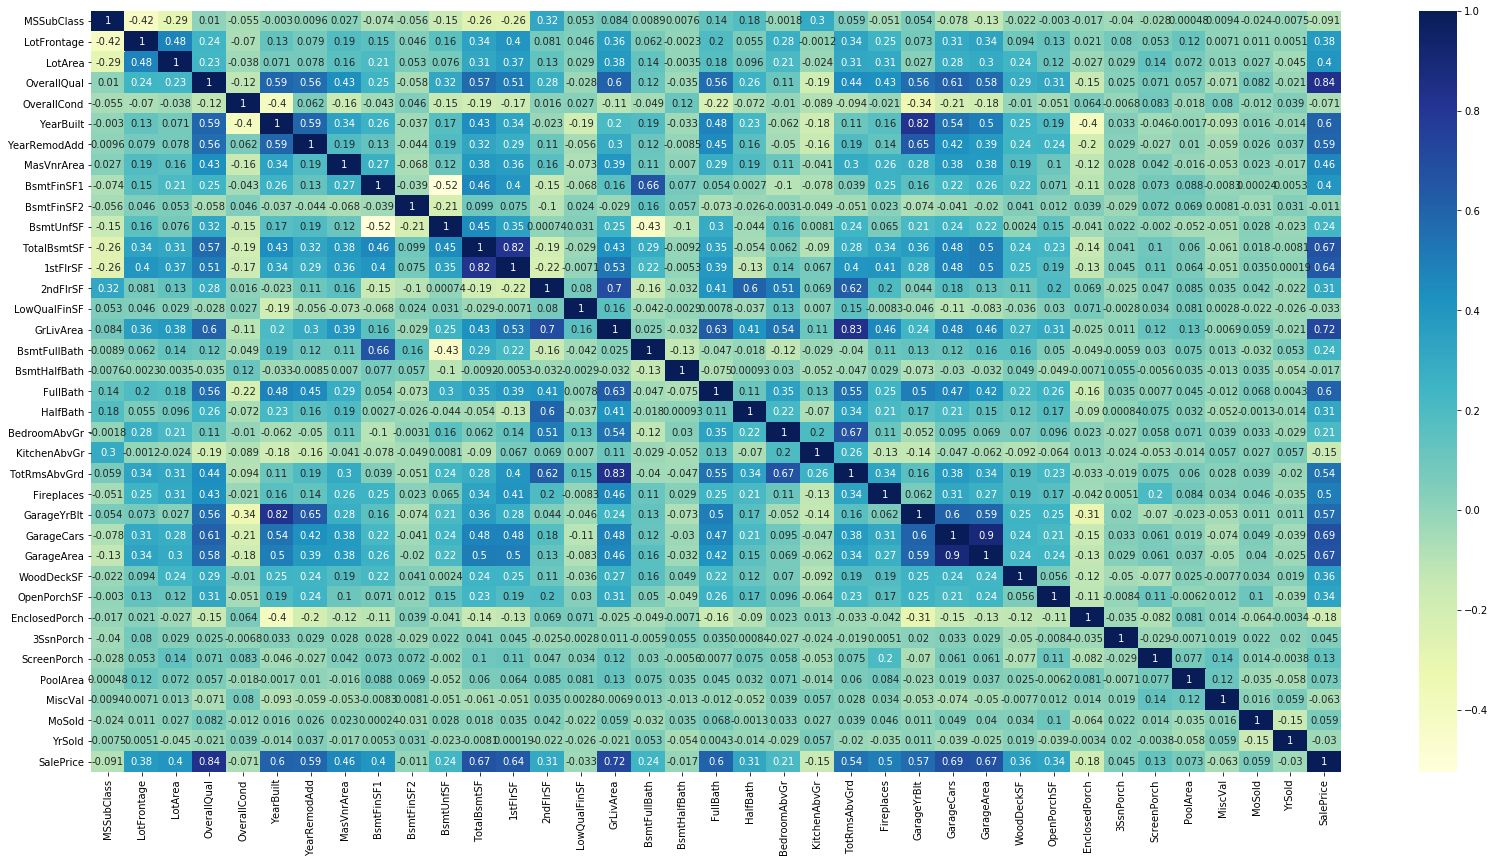

In [34]:
corr_matrix = train[numeric_columns].corr()
plt.subplots(figsize =(28,14))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

### Imputing missing values

In [35]:
# Filling Non-Numeric columns with None
for col in ('PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType','MSSubClass'):
            all_data[col] = all_data[col].fillna('None')

In [36]:
# Fill in missing values by the median LotFrontage of the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [37]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','MasVnrArea'):
    all_data[col] = all_data[col].fillna(0)

In [38]:
for col in ('MSZoning','Electrical','KitchenQual','Exterior1st','Exterior2nd','SaleType','Functional'):
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

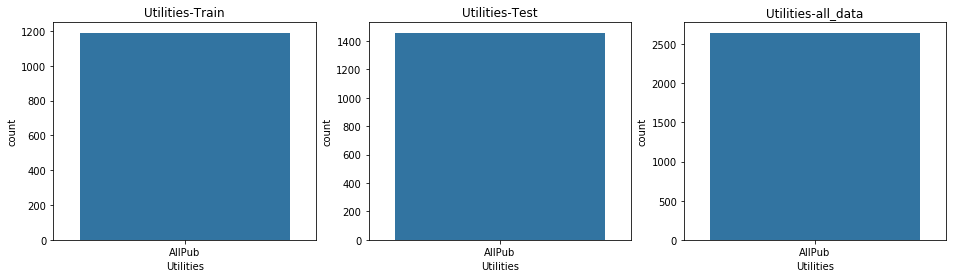

In [39]:
plt.subplots(figsize =(16, 4))
plt.subplot(1, 3, 1)
sns.countplot(train['Utilities']).set_title('Utilities-Train')
plt.subplot(1, 3, 2)
sns.countplot(test['Utilities']).set_title('Utilities-Test')
plt.subplot(1, 3, 3)
sns.countplot(all_data['Utilities']).set_title('Utilities-all_data')
plt.show()

In [40]:
all_data = all_data.drop(['Utilities'], axis=1)

In [41]:
print("Check if there is any missing values present in the dataset") 
missing_count_df = pd.DataFrame(all_data.isnull().sum().items(), columns=['Column', 'Count']).sort_values('Count', ascending=False).reset_index(drop=True)
missing_count_df[missing_count_df['Count'] > 0]


Check if there is any missing values present in the dataset


,Column,Count


In [42]:
# Transforming some numerical variables that are actually categorical
for col in ('MSSubClass','OverallCond','YrSold','MoSold'):
    all_data[col] = all_data[col].apply(str)

In [43]:
all_data['Remod_Diff'] = all_data['YearRemodAdd'] - all_data['YearBuilt']
all_data.drop('YearRemodAdd', axis=1, inplace=True)

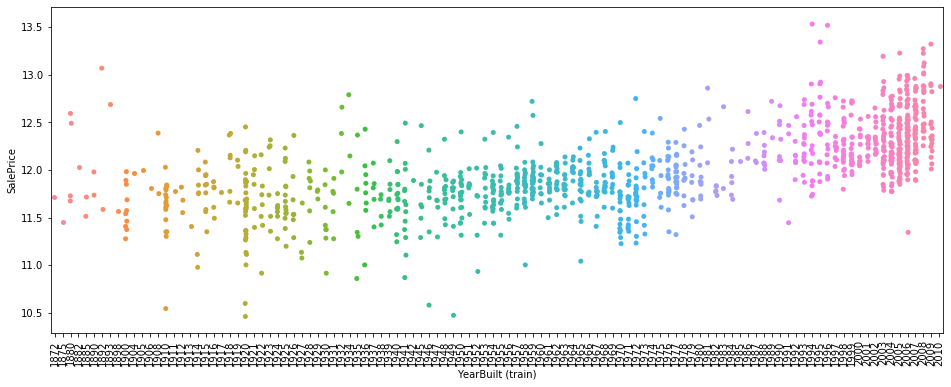

In [44]:
# YearBuilt
plt.figure(figsize =(16, 6))
sns.stripplot(x=train['YearBuilt'], y=train['SalePrice'], jitter=True)
plt.xlabel('YearBuilt (train)')
plt.xticks(rotation=90)

plt.show()

In [45]:
all_data['YearBuilt_Band'] = pd.cut(all_data['YearBuilt'], 7)
pd.DataFrame({'seperations' :all_data['YearBuilt_Band'].unique()})

,seperations
0,"(1990.286, 2010.0]"
1,"(1970.571, 1990.286]"
2,"(1911.429, 1931.143]"
3,"(1931.143, 1950.857]"
4,"(1950.857, 1970.571]"
5,"(1891.714, 1911.429]"
6,"(1871.862, 1891.714]"


In [46]:
raw_separations = list(all_data['YearBuilt_Band'].unique())
raw_separations

[Interval(1990.286, 2010.0, closed='right'),
 Interval(1970.571, 1990.286, closed='right'),
 Interval(1911.429, 1931.143, closed='right'),
 Interval(1931.143, 1950.857, closed='right'),
 Interval(1950.857, 1970.571, closed='right'),
 Interval(1891.714, 1911.429, closed='right'),
 Interval(1871.862, 1891.714, closed='right')]

In [47]:
def slicing(raw_separations):
    separations = set()
    for count in range(len(raw_separations)):
        separations.update(set(float(x.strip()) for x in str(raw_separations[count]).strip('[]()').split(',')))
    return list(sorted(set(separations)))

slices = slicing(raw_separations)

slices_df = pd.DataFrame({'slices' : slices}).reset_index(drop = True)
slices_df

,slices
0,1871.862
1,1891.714
2,1911.429
3,1931.143
4,1950.857
5,1970.571
6,1990.286
7,2010.000


In [48]:
all_data.loc[all_data['YearBuilt'] <= slices[1],'YearBuilt'] = 1
all_data.loc[(all_data['YearBuilt'] > slices[1]) & (all_data['YearBuilt'] <= slices[2]),'YearBuilt'] = 2
all_data.loc[(all_data['YearBuilt'] > slices[2]) & (all_data['YearBuilt'] <= slices[3]),'YearBuilt'] = 3
all_data.loc[(all_data['YearBuilt'] > slices[3]) & (all_data['YearBuilt'] <= slices[4]),'YearBuilt'] = 4
all_data.loc[(all_data['YearBuilt'] > slices[4]) & (all_data['YearBuilt'] <= slices[5]),'YearBuilt'] = 5
all_data.loc[(all_data['YearBuilt'] > slices[5]) & (all_data['YearBuilt'] <= slices[6]),'YearBuilt'] = 6
all_data.loc[(all_data['YearBuilt'] > slices[6]),'YearBuilt'] = 7

all_data['YearBuilt'] = all_data['YearBuilt'].astype(int)

all_data.drop('YearBuilt_Band', axis=1, inplace=True)

all_data = pd.get_dummies(all_data, columns = ["YearBuilt"], prefix="YearBuilt")

In [49]:
all_data['GarageYrBlt_Band'] = pd.qcut(all_data['GarageYrBlt'], 3)
pd.DataFrame({'seperations' :all_data['GarageYrBlt_Band'].unique()})

,seperations
0,"(1997.0, 2207.0]"
1,"(1963.0, 1997.0]"
2,"(-0.001, 1963.0]"


In [50]:
slices = slicing(list(all_data['GarageYrBlt_Band'].unique()))
slices_df = pd.DataFrame({'slices' : slices}).sort_values(by=['slices']).reset_index(drop = True)
slices = list(slices_df['slices'])
slices_df

,slices
0,-0.001
1,1963.000
2,1997.000
3,2207.000


In [51]:
all_data.loc[all_data['GarageYrBlt']<=slices[1], 'GarageYrBlt'] = 1
all_data.loc[(all_data['GarageYrBlt']>slices[1]) & (all_data['GarageYrBlt']<=slices[2]), 'GarageYrBlt'] = 2
all_data.loc[all_data['GarageYrBlt']>slices[2], 'GarageYrBlt'] = 3
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].astype(int)
all_data.drop('GarageYrBlt_Band', axis=1, inplace=True)
all_data = pd.get_dummies(all_data, columns = ["GarageYrBlt"], prefix="GarageYrBlt")

In [52]:
categorical_columns = all_data.select_dtypes(include=['object']).columns.values.tolist()

print(categorical_columns)
print('Number of Categorical Columns = ',len(categorical_columns))

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
Number of Categorical Columns =  46


In [53]:
categorical_cols = categorical_columns + ['MSSubClass','OverallCond','YrSold','MoSold']

for c in categorical_cols:
    le = LabelEncoder() 
    le.fit(list(all_data[c].values)) 
    all_data[c] = le.transform(list(all_data[c].values))
      
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2649, 86)


In [54]:
all_data = pd.get_dummies(all_data, columns = ["MSZoning"], prefix="MSZoning")
all_data = pd.get_dummies(all_data, columns = ["Neighborhood"], prefix="Neighborhood")
all_data = pd.get_dummies(all_data, columns = ["RoofStyle"], prefix="RoofStyle")
all_data = pd.get_dummies(all_data, columns = ["Exterior1st"], prefix="Exterior1st")
all_data = pd.get_dummies(all_data, columns = ["Exterior2nd"], prefix="Exterior2nd")
all_data = pd.get_dummies(all_data, columns = ["Foundation"], prefix="Foundation")
all_data = pd.get_dummies(all_data, columns = ["GarageType"], prefix="GarageType")
all_data.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofMatl,MasVnrType,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Remod_Diff,YearBuilt_1,YearBuilt_2,YearBuilt_3,YearBuilt_4,YearBuilt_5,YearBuilt_6,YearBuilt_7,GarageYrBlt_1,GarageYrBlt_2,GarageYrBlt_3,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_8,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18,Neighborhood_19,Neighborhood_20,Neighborhood_21,Neighborhood_22,Neighborhood_23,Neighborhood_24,RoofStyle_0,RoofStyle_1,RoofStyle_2,RoofStyle_3,RoofStyle_4,RoofStyle_5,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior1st_5,Exterior1st_6,Exterior1st_7,Exterior1st_8,Exterior1st_9,Exterior1st_10,Exterior1st_11,Exterior1st_12,Exterior1st_13,Exterior1st_14,Exterior2nd_0,Exterior2nd_1,Exterior2nd_2,Exterior2nd_3,Exterior2nd_4,Exterior2nd_5,Exterior2nd_6,Exterior2nd_7,Exterior2nd_8,Exterior2nd_9,Exterior2nd_10,Exterior2nd_11,Exterior2nd_12,Exterior2nd_13,Exterior2nd_14,Exterior2nd_15,Foundation_0,Foundation_1,Foundation_2,Foundation_3,Foundation_4,Foundation_5,GarageType_0,GarageType_1,GarageType_2,GarageType_3,GarageType_4,GarageType_5,GarageType_6
0,10,65.0,8450,1,1,3,3,4,0,2,2,0,5,7,4,0,1,196.0,2,4,2,4,3,2,706.0,6,0.0,150.0,856.0,0,0,1,4,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,3,2,2.0,548.0,5,5,2,0,61,0,0,0,0,3,4,1,0,4,2,8,4,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,5,80.0,9600,1,1,3,3,2,0,1,2,0,2,6,7,0,2,0.0,3,4,2,4,1,0,978.0,6,0.0,284.0,1262.0,0,0,1,4,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,5,2,2.0,460.0,5,5,2,298,0,0,0,0,0,3,4,1,0,7,1,8,4,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,10,68.0,11250,1,1,0,3,4,0,2,2,0,5,7,4,0,1,162.0,2,4,2,4,2,2,486.0,6,0.0,434.0,920.0,0,0,1,4,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,5,2,2.0,608.0,5,5,2,0,42,0,0,0,0,3,4,1,0,11,2,8,4,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,11,60.0,9550,1,1,0,3,0,0,2,2,0,5,7,4,0,2,0.0,3,4,4,1,3,0,216.0,6,0.0,540.0,756.0,0,2,1,4,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,3,3.0,642.0,5,5,2,0,35,272,0,0,0,3,4,1,0,4,0,8,0,55,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
4,10,84.0,14260,1,1,0,3,2,0,2,2,0,5,8,4,0,1,350.0,2,4,2,4,0,2,655.0,6,0.0,490.0,1145.0,0,0,1,4,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,5,2,3.0,836.0,5,5,2,192,84,0,0,0,0,3,4,1,0,3,2,8,4,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


### Handling Skewness

In [55]:
numeric_features = all_data.dtypes[all_data.dtypes != 'object'].index
skewed_features = all_data[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print('Skew in numerical features:')
skewness = pd.DataFrame({'Skew' :skewed_features})
skewness.head(10)

Skew in numerical features:


,Skew
Exterior1st_7,51.439288
Exterior1st_10,51.439288
Exterior2nd_9,51.439288
Exterior1st_4,36.352452
Exterior1st_1,36.352452
RoofStyle_5,29.664813
Exterior2nd_4,29.664813
Exterior2nd_1,25.675894
Foundation_5,25.675894
MiscVal,24.599026


In [56]:
unskewed_features = skewed_features
skewness = skewness[abs(skewness) > .5]
print('There are {} skewed numerical features to Box Cox transform'.format(skewness.shape[0]))

There are 159 skewed numerical features to Box Cox transform


In [57]:
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
numeric_features = all_data.dtypes[all_data.dtypes != 'object'].index
skewed_features = all_data[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

print('Skew in numerical features:')
skewness = pd.DataFrame({'Skew' :skewed_features})
skewness.head()

Skew in numerical features:


,Skew
Exterior2nd_9,51.439288
Exterior1st_7,51.439288
Exterior1st_10,51.439288
Exterior1st_4,36.352452
Exterior1st_1,36.352452


### Scaling the features

In [58]:
# Getting the new train and test sets.
X = all_data[:n_train]
test = all_data[n_train:]
print("Train shape:", X.shape)
print("Test shape:", test.shape)

Train shape: (1190, 159)
Test shape: (1459, 159)


### Recursive Feature Elimination (RFE)

In [59]:
# Running RFE with the output number of the variable equal to 80

lm = LinearRegression()
lm.fit(X, y)

# running RFE
rfe = RFE(lm, 80)            
rfe = rfe.fit(X, y)

In [60]:
# Assign the columns selected by RFE to cols

col = X.columns[rfe.support_]

# Assign the 80 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

In [61]:
# Assign the 80 columns to X_rfe

X_rfe = X[col].values
test_rfe = test[col].values

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=.3, random_state=42)
datasets = pd.DataFrame({'DataSet': ['X_train', 'X_test','y_train', 'y_test'], 
                         'Shape': [X_train.shape, X_test.shape, y_train.shape, y_test.shape]})
datasets

,DataSet,Shape
0,X_train,"(833, 80)"
1,X_test,"(357, 80)"
2,y_train,"(833,)"
3,y_test,"(357,)"


### Model Building and Evaluation

In [63]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

In [64]:
def model_evaluation(grids):
    results = {}
    for k, v in grids.items():
        test_mse = rmse(y_test, v.best_estimator_.fit(X_train, y_train).predict(X_test))
        train_mse = rmse(y_train, v.best_estimator_.fit(X_train, y_train).predict(X_train))
        results[k] = [test_mse, train_mse, v.best_params_]
    return pd.DataFrame(results, index =['Test', 'Train', 'Best_Params']).T

In [ ]:
lasso_params = {
    'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.02, 0.05],
    'max_iter': [200, 300], 
    'tol': [1e-2, 1e-3], 
    'selection': ['random']
}

kernelRidge_params = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1], 
    'coef0': [100, 10, 2.5], 
    'degree': [2], 
    'gamma': [None], 
    'kernel': ['polynomial']
}

elasticNet_params = {
    'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.02],
    'copy_X': [True], 
    'l1_ratio': [0.6, 0.75, 0.9], 
    'fit_intercept': [True], 
    'normalize': [False],
    'precompute': [False], 
    'max_iter': [300], 
    'tol': [1e-3], 
    'selection': ['random']
}

xgb_params = {
    'booster': ['gbtree'], 
    'colsample_bytree': [0.8], 
    'gamma': [0.01], 
    'learning_rate': [0.01, 0.05, 0.1], 
    'max_depth': [4], 
    'min_child_weight': [9], 
    'n_estimators': [300], 
    'reg_alpha': [0.1], 
    'reg_lambda': [0.8]
}

gb_params = {
    'n_estimators': [350], 
    'learning_rate': [0.01, 0.05], 
    'max_depth': [3, 5], 
    'subsample':[0.1]
}

rf_params = {
    'n_estimators': [300, 500], 
    'max_features': ['auto'], 
    'max_depth': [5, 10, 15], 
    'min_samples_split': [5, 10], 
    'min_samples_leaf': [1, 5]
}
     
lightGBM_params = {
    'boosting': ['gbdt'], 
    'n_estimators': [125], 
    'reg_lambda': [0.4],
    'num_leaves': [8],
    'learning_rate': [0.1], 
    'max_depth': [4], 
    'subsample': [0.4], 
    'colsample_bytree': [0.9]
}

adaBoost_params = {
    'n_estimators': [40, 50], 
    'learning_rate' : [0.01, 0.1, 0.5, 1]
}


lasso_grid = GridSearchCV(estimator=Lasso(random_state=11),
                                param_grid=lasso_params,
                                scoring='neg_mean_absolute_error',
                                cv=5,
                                return_train_score=True).fit(X_train, y_train)

kernelRidge_grid = GridSearchCV(estimator = KernelRidge(),
                                param_grid = kernelRidge_params,
                                scoring='neg_mean_absolute_error',
                                cv=5,
                                return_train_score=True).fit(X_train, y_train)

elasticNet_grid = GridSearchCV(estimator = ElasticNet(random_state=11),
                                param_grid = elasticNet_params,
                                scoring='neg_mean_absolute_error',
                                cv=5,
                                return_train_score=True).fit(X_train, y_train)

xgBoost_grid = GridSearchCV(estimator = xgb.XGBRegressor(random_state=11),
                                param_grid = xgb_params,
                                scoring='neg_mean_absolute_error',
                                cv=5,
                                return_train_score=True).fit(X_train, y_train)

gradientBoosting_grid = GridSearchCV(estimator = GradientBoostingRegressor(loss='huber', random_state=11),
                                param_grid = gb_params,
                                scoring='neg_mean_absolute_error',
                                cv=5,
                                return_train_score=True).fit(X_train, y_train)

randomForest_grid = GridSearchCV(estimator = RandomForestRegressor(random_state=11),
                                param_grid = rf_params,
                                scoring='neg_mean_absolute_error',
                                cv=5,
                                return_train_score=True).fit(X_train, y_train)

lightGBM_grid = GridSearchCV(estimator = lgb.LGBMRegressor(n_jobs=-1, random_state=11),
                                param_grid = lightGBM_params,
                                scoring='neg_mean_absolute_error',
                                cv=5,
                                return_train_score=True).fit(X_train, y_train)

adaBoost_grid = GridSearchCV(estimator = AdaBoostRegressor(random_state=11),
                                param_grid = adaBoost_params,
                                scoring='neg_mean_absolute_error',
                                cv=5,
                                return_train_score=True).fit(X_train, y_train)

grids = {
          'Lasso': lasso_grid,
          'KernelRidge': kernelRidge_grid,
          'ElasticNet': elasticNet_grid,
          'XGBoost': xgBoost_grid,
          'GradientBoosting': gradientBoosting_grid, 
          'RandomForest': randomForest_grid,  
          'LightGBM': lightGBM_grid,
          'AdaBoost': adaBoost_grid,
         } 


model_evaluation(grids)

### Averaged Models 

In [ ]:
class AveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

In [ ]:
averaged_models = AveragedModels(models = (lasso_grid.best_estimator_, kernelRidge_grid.best_estimator_, elasticNet_grid.best_estimator_, gradientBoosting_grid.best_estimator_))

score = r2_score(y_test, averaged_models.fit(X_train, y_train).predict(X_test))

print(" Averaged base models r2 score: {:.4f}".format(score))

### Stacking averaged Models

In [ ]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=42)
        
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [ ]:
stacked_averaged_models = StackingAveragedModels(base_models = (kernelRidge_grid.best_estimator_, elasticNet_grid.best_estimator_, gradientBoosting_grid.best_estimator_),
                                                 meta_model = lasso_grid.best_estimator_)

score = r2_score(y_test, stacked_averaged_models.fit(X_train, y_train).predict(X_test))

print("Stacking Averaged models score: {:.4f}".format(score))

### Ensembling StackedRegressor, XGBoost and LightGBM

In [ ]:
stacked_averaged_models.fit(X_rfe, y)
stacked_train_pred = stacked_averaged_models.predict(X_rfe)
stacked_pred = np.expm1(stacked_averaged_models.predict(test_rfe))
print(rmse(y, stacked_train_pred))

In [ ]:
model_xgBoost = xgBoost_grid.best_estimator_
model_xgBoost.fit(X_rfe, y)
xgBoost_train_pred = model_xgBoost.predict(X_rfe)
xgBoost_pred = np.expm1(model_xgBoost.predict(test_rfe))
print(rmse(y, xgBoost_train_pred))

In [ ]:
model_lightGBM = lightGBM_grid.best_estimator_
model_lightGBM.fit(X_rfe, y)
lightGBM_train_pred = model_lightGBM.predict(X_rfe)
lightGBM_pred = np.expm1(model_lightGBM.predict(test_rfe))
print(rmse(y, lightGBM_train_pred))

In [ ]:
print('RMSE score on train data:')
print(rmse(y, stacked_train_pred*0.70 + xgBoost_train_pred*0.15 + lightGBM_train_pred*0.15))

### Ensemble prediction

In [ ]:
ensemble = stacked_pred*0.70 + + xgBoost_pred*0.15 + lightGBM_pred*0.15

In [ ]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)